In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\91934\OneDrive\Documents\EDA_Dataset\Day-8P-1\DA314_S8_EmployeeAttrition_Data_Practice.csv")
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_encoded,AgeGroup
0,1313919,41,No,Travel_Rarely,Cardiology,1,2,Life Sciences,2,Female,...,0,8,0,1,6,4,0,5,1,36-45
1,1200302,49,No,Travel_Frequently,Maternity,8,1,Life Sciences,3,Male,...,1,10,3,3,10,7,1,7,0,46-55
2,1060315,37,Yes,Travel_Rarely,Maternity,2,2,Other,4,Male,...,0,7,3,3,0,0,0,0,1,36-45
3,1272912,33,No,Travel_Frequently,Maternity,3,4,Life Sciences,4,Female,...,0,8,3,3,8,7,3,0,1,26-35
4,1414939,27,No,Travel_Rarely,Maternity,2,1,Medical,1,Male,...,1,6,3,3,2,2,2,2,0,26-35


In [3]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorkedPrevious', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'OverTime_encoded', 'AgeGroup'],
      dtype='object')

In [3]:
df.shape

(1676, 31)

In [4]:
df.isna().sum()

EmployeeID                    0
Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorkedPrevious    0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
Shift                         0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
OverTime_encoded              0
AgeGroup                      0
dtype: i

In [5]:
df.duplicated().sum()

0

In [4]:
attrition_rate1 = df.groupby(["Department","JobLevel"])['Attrition'].value_counts(normalize = True).rename("rate")
print(attrition_rate1)

Department  JobLevel  Attrition
Cardiology  1         No           0.655172
                      Yes          0.344828
            2         No           0.900344
                      Yes          0.099656
            3         No           0.876289
                      Yes          0.123711
            4         No           0.925000
                      Yes          0.075000
            5         No           1.000000
Maternity   1         No           0.788599
                      Yes          0.211401
            2         No           0.977169
                      Yes          0.022831
            3         No           0.967742
                      Yes          0.032258
            4         No           1.000000
            5         No           0.947368
                      Yes          0.052632
Neurology   1         No           0.796460
                      Yes          0.203540
            2         No           1.000000
            3         No           0.946429


In [5]:
attrition_rate1.unstack()

Attrition                  No       Yes
Department JobLevel                    
Cardiology 1         0.655172  0.344828
           2         0.900344  0.099656
           3         0.876289  0.123711
           4         0.925000  0.075000
           5         1.000000       NaN
Maternity  1         0.788599  0.211401
           2         0.977169  0.022831
           3         0.967742  0.032258
           4         1.000000       NaN
           5         0.947368  0.052632
Neurology  1         0.796460  0.203540
           2         1.000000       NaN
           3         0.946429  0.053571
           4         1.000000       NaN
           5         0.978261  0.021739

<Axes: xlabel='Department,JobLevel'>

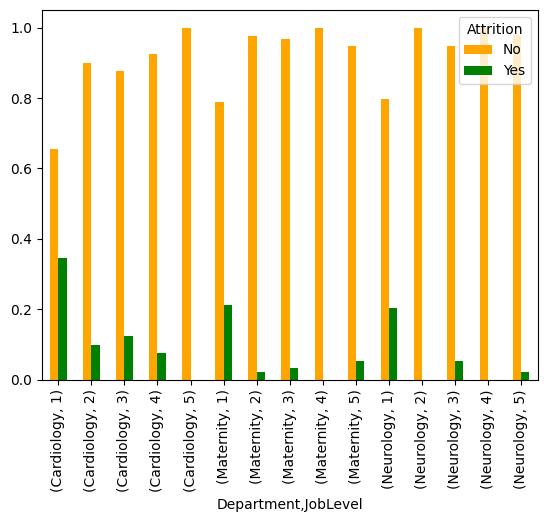

In [6]:
attrition_rate1.unstack().plot(
    kind = "bar",
    color = ["orange","green"]
)

In [7]:
attrition_rate2 = df.groupby(["EducationField","BusinessTravel"])['Attrition'].value_counts(normalize = True).rename("rate")
print(attrition_rate2)

EducationField    BusinessTravel     Attrition
Human Resources   Non-Travel         No           1.000000
                  Travel_Frequently  No           0.500000
                                     Yes          0.500000
                  Travel_Rarely      No           0.833333
                                     Yes          0.166667
Life Sciences     Non-Travel         No           0.942857
                                     Yes          0.057143
                  Travel_Frequently  No           0.767606
                                     Yes          0.232394
                  Travel_Rarely      No           0.903093
                                     Yes          0.096907
Marketing         Non-Travel         No           0.923077
                                     Yes          0.076923
                  Travel_Frequently  No           0.787879
                                     Yes          0.212121
                  Travel_Rarely      No           0.860140
         

<Axes: ylabel='EducationField,BusinessTravel'>

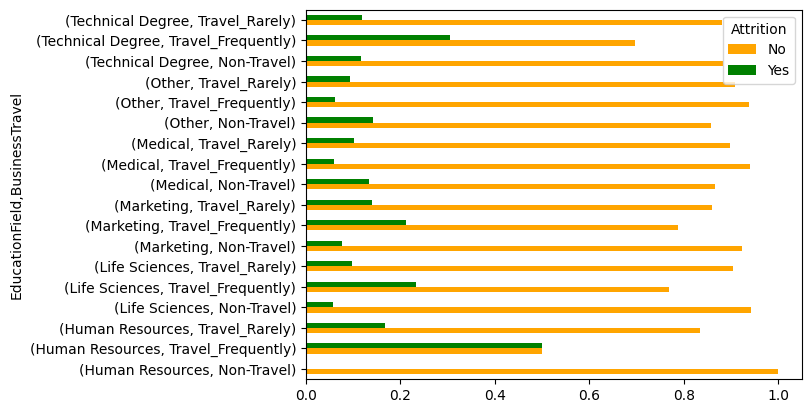

In [8]:
attrition_rate2.unstack().plot(
    kind = "barh",
    color = ["orange","green"]
)

In [9]:
result1 = pd.pivot_table(
    data=df[df["Attrition"]=="Yes"],
    index="WorkLifeBalance",#WorkLifeBalance
    values ="Attrition",
    columns ="JobInvolvement",#JobInvolvement
    aggfunc = "count",
    fill_value =0,
   # margins=True
)
result1

JobInvolvement,1,2,3,4
WorkLifeBalance,,,,
1,4,8,12,0
2,9,19,23,3
3,15,32,46,7
4,1,12,8,0


In [10]:
result2 = pd.pivot_table(
    data=df[df["Attrition"]=="No"],
    index="WorkLifeBalance",#WorkLifeBalance
    values ="Attrition",
    columns ="JobInvolvement",#JobInvolvement
    aggfunc = "count",
    fill_value =0,
   # margins=True
)
result2

JobInvolvement,1,2,3,4
WorkLifeBalance,,,,
1,2,15,43,6
2,13,72,210,36
3,47,237,542,102
4,5,38,99,10


In [11]:
final_result = result1.div((result1+result2),axis=0)
final_result.columns=['Low',  'Medium','High', 'Veryhigh']
final_result.index=['bad','good','better','best']
final_result

,Low,Medium,High,Veryhigh
bad,0.666667,0.347826,0.218182,0.000000
good,0.409091,0.208791,0.098712,0.076923
better,0.241935,0.118959,0.078231,0.064220
best,0.166667,0.240000,0.074766,0.000000


<Axes: >

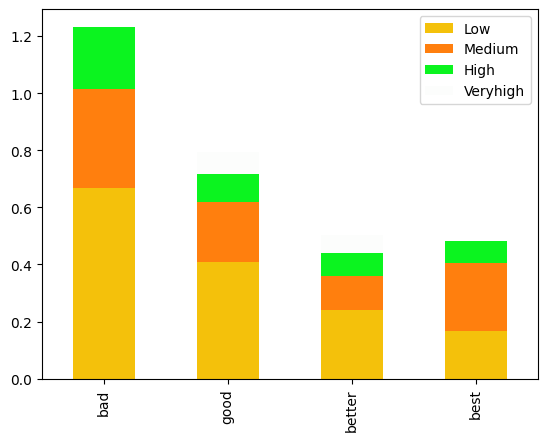

In [12]:
final_result.plot(
    kind ="bar",
    stacked=True,
    color =['#F4C10B','#ff7f0e','#0BF41F','#05703503']

)

<Axes: xlabel='WorkLifeBalance'>

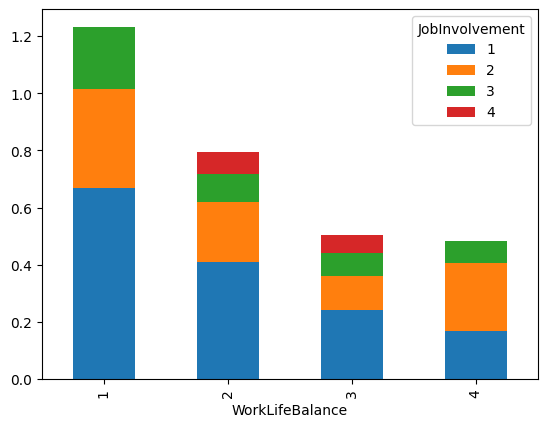

In [13]:
result1.div((result1+result2),axis=0).plot(
    kind ="bar",
    stacked=True,
)

In [15]:
result3 = pd.pivot_table(
    data=df[df["Attrition"]=="Yes"],
    index="BusinessTravel",
    values ="Attrition",
    columns ="OverTime",
    aggfunc = "count",
    fill_value =0,
    #margins=True
)
result3

OverTime,No,Yes
BusinessTravel,,
Non-Travel,5,11
Travel_Frequently,18,39
Travel_Rarely,37,89


<Axes: xlabel='BusinessTravel'>

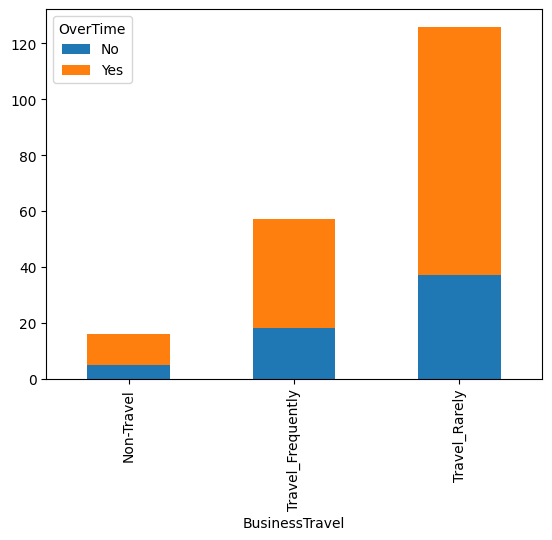

In [16]:
result3.plot(
    kind ="bar",
    stacked =True
)

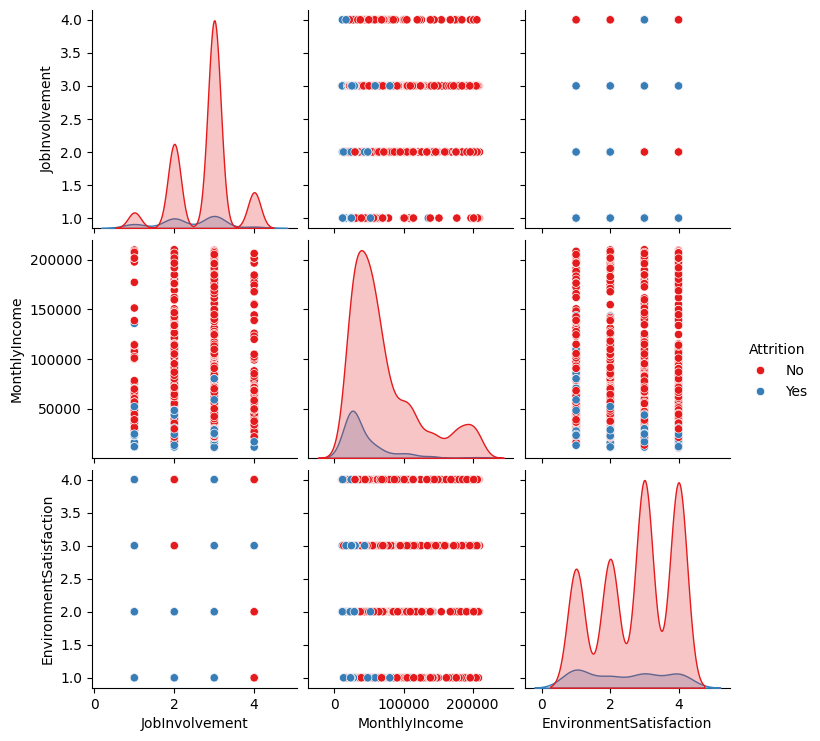

In [17]:
sns.pairplot(
    data = df[['JobInvolvement','MonthlyIncome','EnvironmentSatisfaction','Attrition']],
    hue ="Attrition",
    palette = "Set1"
)

In [ ]:
#5

In [18]:
columns_list =["JobSatisfaction","EnvironmentSatisfaction","RelationshipSatisfaction"]

<Axes: >

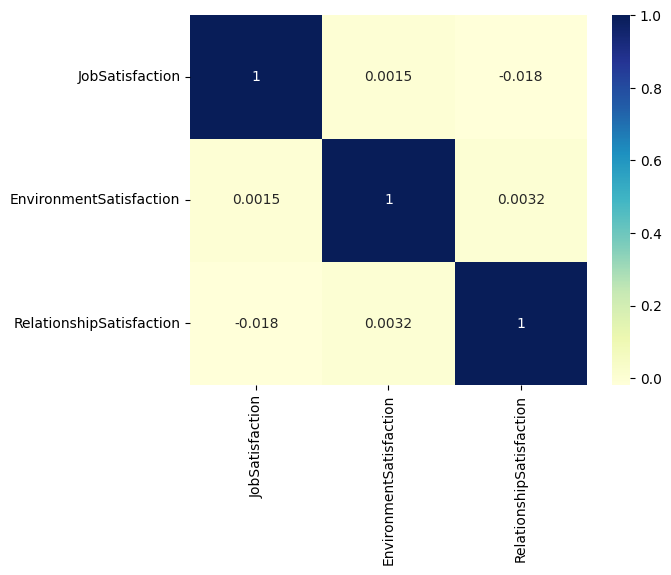

In [20]:
sns.heatmap(
    df[columns_list].corr(),
    annot =True,
    cmap="YlGnBu"
)

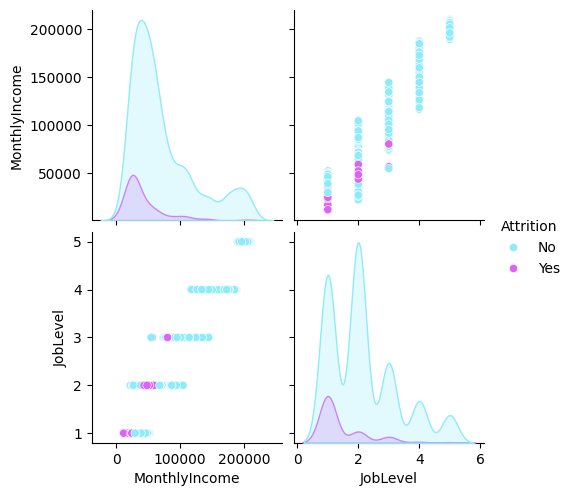

In [21]:
sns.pairplot(
    data=df[["MonthlyIncome","JobLevel","Attrition"]],
    hue ="Attrition",
    palette = {"No": "#8FEAFA", "Yes": "#DC63F8"}
)